<a href="https://colab.research.google.com/github/qagustina/mentoria-churnprediction/blob/master/Grupo2_Mentor%C3%ADaChurn_TP3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DiploDatos 2022 - Mentoría "Churn Prediction: ¿Cómo retengo a mis clientes? Machine Learning aplicado a un caso de negocio"

---
**Trabajo Práctico Nº3 - Aprendizaje Supervisado**

**Integrantes Grupo 2**

*   Natalia Grasselli
*   Rodrigo Pizarro
*   Agustina Quirós
*   Natalia Tassin

## Carga del data set

En este entregable continuaremos trabajando sobre el dataset final del trabajo anterior. 

In [ ]:
#Importamos las librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
np.set_printoptions(suppress=True)  # no usar notacion "e"
pd.set_option('display.float_format', lambda x: '%.3f' % x)

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Parámetros globales

RANDOM_STATE = 45

In [ ]:
#Importamos el dataset
df_churn_clean = pd.read_csv(
    'https://media.githubusercontent.com/media/qagustina/mentoria-churnprediction/master/df_churn_clean.csv')

In [ ]:
df_churn_clean

,userId,churn_user,sessionId,ts,registration,songsCountByUser,SongCountBySession,meanSessionLengthInSeconds,countSessionsByUser,BounceRate,...,page_Submit Upgrade,page_Thumbs Down,page_Thumbs Up,page_Upgrade,level_free,level_paid,PC 1,PC 2,PC 3,PC 4
0,293.000,1.000,292.000,1538352011.000,1532063507000.000,1.103,-0.918,-0.310,1.532,-0.457,...,-0.023,-0.097,-0.217,-0.043,1.950,-1.950,2.921,3.118,-1.445,-0.176
1,98.000,0.000,97.000,1538352025.000,1538069638000.000,0.214,-1.204,-0.838,0.077,0.329,...,-0.023,-0.097,-0.217,-0.043,1.950,-1.950,0.445,2.190,-1.260,0.624
2,179.000,0.000,178.000,1538352118.000,1535953455000.000,-0.052,-0.408,-0.839,-0.375,-0.457,...,-0.023,-0.097,-0.217,-0.043,-0.513,0.513,-0.330,-1.036,-0.392,0.141
3,179.000,0.000,178.000,1538352119.000,1535953455000.000,-0.052,-0.408,-0.839,-0.375,-0.457,...,-0.023,-0.097,-0.217,-0.043,-0.513,0.513,-0.403,-0.039,2.907,0.585
4,246.000,1.000,245.000,1538352124.000,1535931018000.000,0.392,-0.240,0.258,-0.225,-0.457,...,-0.023,-0.097,-0.217,-0.043,-0.513,0.513,1.128,-0.600,-0.446,-0.529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527961,300010.000,0.000,882.000,1543622316.000,1536850071000.000,-0.735,-0.282,1.866,-0.877,-0.457,...,-0.023,-0.097,-0.217,-0.043,-0.513,0.513,-2.200,-1.093,-0.269,-1.783
527962,300049.000,0.000,991.000,1543622332.000,1537523064000.000,2.034,-0.408,1.949,3.239,-0.457,...,-0.023,-0.097,-0.217,-0.043,-0.513,0.513,7.207,0.803,-0.568,-2.581
527963,300039.000,0.000,916.000,1543622368.000,1536228638000.000,-1.237,-1.043,3.275,-1.178,-0.457,...,-0.023,-0.097,-0.217,-0.043,-0.513,0.513,-4.123,-1.044,-0.224,-2.964
527964,300038.000,0.000,966.000,1543622392.000,1535616235000.000,-0.024,-1.015,1.720,0.578,-0.457,...,-0.023,-0.097,-0.217,-0.043,-0.513,0.513,0.523,-0.169,-0.460,-2.045




> Preprocesado de datos



In [ ]:
df_churn_clean.corr()

,userId,churn_user,sessionId,ts,registration,songsCountByUser,SongCountBySession,meanSessionLengthInSeconds,countSessionsByUser,BounceRate,...,page_Submit Upgrade,page_Thumbs Down,page_Thumbs Up,page_Upgrade,level_free,level_paid,PC 1,PC 2,PC 3,PC 4
userId,1.000,-0.068,-0.608,-0.033,0.058,-0.018,-0.193,0.860,0.211,-0.250,...,0.003,0.015,0.044,0.003,-0.001,0.001,0.018,0.077,0.053,-0.777
churn_user,-0.068,1.000,-0.128,-0.203,-0.076,-0.056,-0.002,-0.015,-0.048,-0.095,...,0.003,0.010,-0.009,0.005,0.069,-0.069,-0.060,0.089,-0.028,0.010
sessionId,-0.608,-0.128,1.000,0.696,-0.020,0.165,0.209,-0.634,0.027,0.221,...,-0.010,-0.012,-0.020,-0.020,-0.227,0.227,0.164,-0.206,0.001,0.543
ts,-0.033,-0.203,0.696,1.000,0.016,0.049,0.090,-0.077,0.043,0.058,...,-0.009,0.001,0.000,-0.020,-0.233,0.233,0.067,-0.188,0.037,0.064
registration,0.058,-0.076,-0.020,0.016,1.000,0.091,-0.001,0.018,0.100,0.031,...,-0.001,0.004,0.001,-0.003,-0.025,0.025,0.103,0.015,-0.000,-0.013
songsCountByUser,-0.018,-0.056,0.165,0.049,0.091,1.000,0.183,-0.102,0.883,0.087,...,-0.010,-0.007,0.009,-0.021,-0.284,0.284,0.992,0.054,-0.007,0.024
SongCountBySession,-0.193,-0.002,0.209,0.090,-0.001,0.183,1.000,-0.186,0.021,0.040,...,-0.009,-0.004,-0.006,-0.026,-0.364,0.364,0.212,-0.477,0.080,0.323
meanSessionLengthInSeconds,0.860,-0.015,-0.634,-0.077,0.018,-0.102,-0.186,1.000,0.091,-0.261,...,0.003,0.016,0.034,0.004,0.017,-0.017,-0.078,0.053,0.060,-0.848
countSessionsByUser,0.211,-0.048,0.027,0.043,0.100,0.883,0.021,0.091,1.000,0.035,...,-0.008,-0.003,0.018,-0.012,-0.151,0.151,0.903,0.223,-0.035,-0.159
BounceRate,-0.250,-0.095,0.221,0.058,0.031,0.087,0.040,-0.261,0.035,1.000,...,-0.002,-0.006,-0.009,-0.002,-0.027,0.027,0.082,-0.038,-0.023,0.634


## Limpieza de valores altamente correlacionados

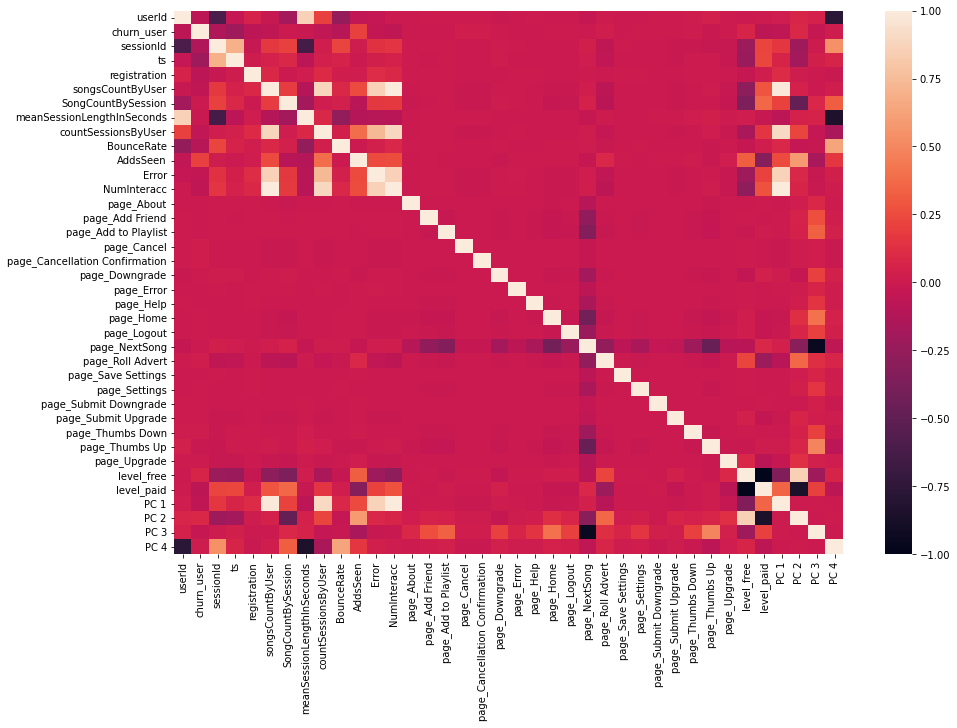

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df_churn_clean.corr(), 
        xticklabels=df_churn_clean.corr().columns,
        yticklabels=df_churn_clean.corr().columns)

Variables correlacionadas

1. sessionId 
2. userId    
3. songsCountByUser
4. meanSessionLengthInSeconds 
6. countSessionsByUser
7. level_free 
8. AddsSeen 
9. BounceRate  
10. page_NextSong
11. level_paid 
12. ts 
13. SongCountBySession
14. PC1
15. PC2
16. PC3 
17. PC4



> En este pre-procesado se optó por eliminar las columnas que presentan alta correlación (una de cada par) y las del análisis de componentes principales.  **PCA** es excelente para explorar y comprender un conjunto de datos. Para las canalizaciones en las que a PCA le sigue un algoritmo de aprendizaje supervisado, no son adecuadas para las iteraciones del modelo. 



In [ ]:
interesting_cols = ['churn_user', 'Error', 'NumInteracc','page_About', 'page_Add Friend', 'page_Add to Playlist', 'page_Cancel','page_Cancellation Confirmation', 
        'page_Downgrade', 'page_Error','page_Help', 'page_Home','page_Logout', 'page_Roll Advert', 'page_Save Settings', 'page_Settings','page_Submit Downgrade', 
        'page_Submit Upgrade', 'page_Thumbs Down', 'page_Thumbs Up','page_Upgrade']

In [ ]:
df_churn = df_churn_clean[interesting_cols]

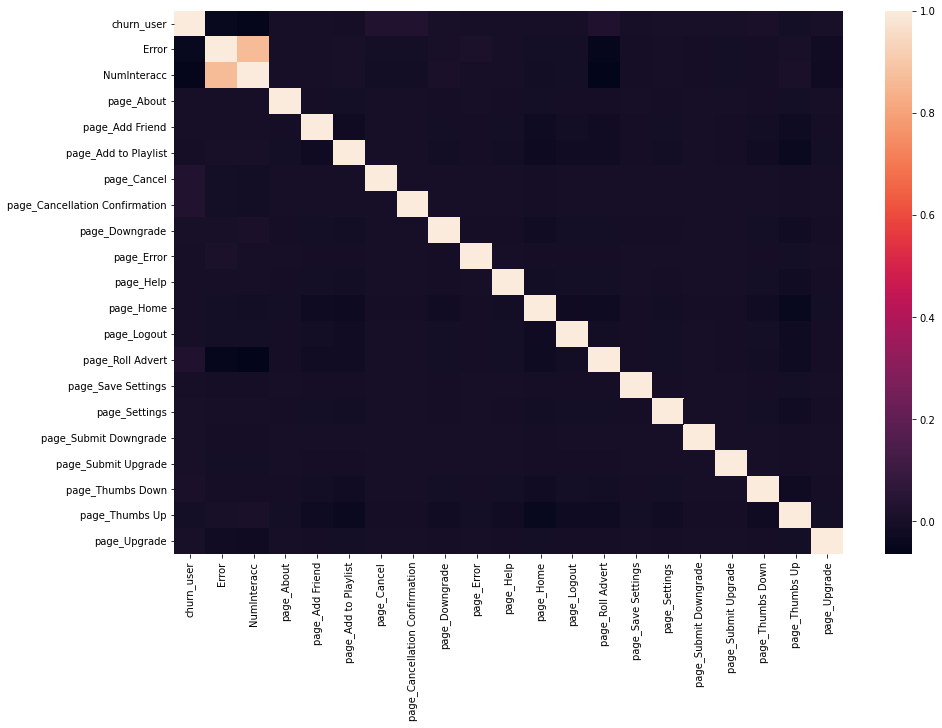

In [ ]:
# Volvemos a verificar las correlaciones en el nuevo Df
plt.figure(figsize=(15,10))
sns.heatmap(df_churn.corr(), 
        xticklabels=df_churn.corr().columns,
        yticklabels=df_churn.corr().columns)



> Ahora obtenemos una matriz sin correlaciones significativas



In [ ]:
df_churn.describe()

,churn_user,Error,NumInteracc,page_About,page_Add Friend,page_Add to Playlist,page_Cancel,page_Cancellation Confirmation,page_Downgrade,page_Error,...,page_Home,page_Logout,page_Roll Advert,page_Save Settings,page_Settings,page_Submit Downgrade,page_Submit Upgrade,page_Thumbs Down,page_Thumbs Up,page_Upgrade
count,527966.000,527966.000,527966.000,527966.000,527966.000,527966.000,527966.000,527966.000,527966.000,527966.000,...,527966.000,527966.000,527966.000,527966.000,527966.000,527966.000,527966.000,527966.000,527966.000,527966.000
mean,0.196,-0.000,0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
std,0.397,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,0.000,-1.041,-1.328,-0.044,-0.125,-0.155,-0.014,-0.014,-0.085,-0.031,...,-0.194,-0.107,-0.122,-0.033,-0.075,-0.015,-0.023,-0.097,-0.217,-0.043
25%,0.000,-0.662,-0.754,-0.044,-0.125,-0.155,-0.014,-0.014,-0.085,-0.031,...,-0.194,-0.107,-0.122,-0.033,-0.075,-0.015,-0.023,-0.097,-0.217,-0.043
50%,0.000,-0.283,-0.274,-0.044,-0.125,-0.155,-0.014,-0.014,-0.085,-0.031,...,-0.194,-0.107,-0.122,-0.033,-0.075,-0.015,-0.023,-0.097,-0.217,-0.043
75%,0.000,0.474,0.573,-0.044,-0.125,-0.155,-0.014,-0.014,-0.085,-0.031,...,-0.194,-0.107,-0.122,-0.033,-0.075,-0.015,-0.023,-0.097,-0.217,-0.043
max,1.000,3.883,3.319,22.685,8.018,6.462,73.020,73.020,11.742,32.383,...,5.164,9.335,8.187,30.025,13.320,67.168,42.879,10.320,4.600,23.357


# 1) Preparación de los datos para aplicar modelos de clasificación

Generar a partir del dataset, los conjuntos de train, test y validation. 

**a. Analizar las proporciones consideradas para cada conjunto con respecto al total del dataset. Verificar el total de datos de cada conjunto.** 

**b. Para cada conjunto (train, test, val), ¿cuántos datos de cada clase target hay (churn y no churn)?, se debe buscar mantener la proporción del dataset total (el desbalanceo que era casi de 3 a 1)**



## a. Balanceo de Clases

In [ ]:
df_churn['churn_user'].value_counts()

0.000    424334
1.000    103632
Name: churn_user, dtype: int64

In [ ]:
#trabajamos sobre una copia
df_churn = df_churn.copy()

Data Balance: Muestreo descendente de clase mayoritaria

In [ ]:
from sklearn.utils import resample
def classes_balance(df):
  # Separate majority and minority classes
  df_majority = df[df.churn_user==0]
  df_minority = df[df.churn_user==1]
  
  # Downsample majority class
  df_majority_downsampled = resample(df_majority, 
                                  replace=False,    # sample without replacement
                                  n_samples=103632, # to match minority class
                                  random_state=RANDOM_STATE) # reproducible results
  
  # Combine minority class with downsampled majority class
  df_downsampled = pd.concat([df_majority_downsampled, df_minority])

  # Al parecer los datos quedan ordenados, primeros los churn_user = 0 y después los churn_user = 1
  ## Shuffle
  from sklearn.utils import shuffle
  df_downsampled = shuffle(df_downsampled)

  # Display new class counts
  print(df_downsampled.churn_user.value_counts())
  return df_downsampled

In [ ]:
df_downsampled = classes_balance(df_churn)

1.000    103632
0.000    103632
Name: churn_user, dtype: int64


In [ ]:
df_downsampled

,churn_user,Error,NumInteracc,page_About,page_Add Friend,page_Add to Playlist,page_Cancel,page_Cancellation Confirmation,page_Downgrade,page_Error,...,page_Home,page_Logout,page_Roll Advert,page_Save Settings,page_Settings,page_Submit Downgrade,page_Submit Upgrade,page_Thumbs Down,page_Thumbs Up,page_Upgrade
36986,1.000,0.096,-0.081,-0.044,-0.125,-0.155,-0.014,-0.014,-0.085,-0.031,...,-0.194,-0.107,-0.122,-0.033,-0.075,-0.015,-0.023,-0.097,-0.217,-0.043
85389,1.000,-0.283,-0.597,-0.044,-0.125,-0.155,-0.014,-0.014,-0.085,-0.031,...,-0.194,-0.107,-0.122,-0.033,-0.075,-0.015,-0.023,-0.097,-0.217,-0.043
330268,1.000,0.096,0.665,-0.044,-0.125,-0.155,-0.014,-0.014,-0.085,-0.031,...,-0.194,-0.107,-0.122,-0.033,-0.075,-0.015,-0.023,-0.097,-0.217,-0.043
338757,0.000,3.883,3.319,-0.044,-0.125,-0.155,-0.014,-0.014,-0.085,-0.031,...,-0.194,-0.107,-0.122,-0.033,-0.075,-0.015,-0.023,-0.097,-0.217,-0.043
946,1.000,-1.041,-0.911,-0.044,-0.125,-0.155,-0.014,-0.014,-0.085,-0.031,...,-0.194,-0.107,-0.122,-0.033,-0.075,-0.015,-0.023,-0.097,-0.217,-0.043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416065,1.000,-1.041,-0.709,-0.044,-0.125,-0.155,-0.014,-0.014,-0.085,-0.031,...,-0.194,-0.107,-0.122,-0.033,-0.075,-0.015,-0.023,-0.097,-0.217,-0.043
119085,0.000,1.989,1.510,-0.044,-0.125,-0.155,-0.014,-0.014,-0.085,-0.031,...,-0.194,-0.107,-0.122,-0.033,-0.075,-0.015,-0.023,-0.097,-0.217,-0.043
192485,1.000,-0.283,-0.597,-0.044,-0.125,-0.155,-0.014,-0.014,-0.085,-0.031,...,-0.194,-0.107,-0.122,-0.033,-0.075,-0.015,-0.023,-0.097,-0.217,-0.043
32419,1.000,0.853,-0.031,-0.044,-0.125,-0.155,-0.014,-0.014,-0.085,-0.031,...,-0.194,-0.107,-0.122,-0.033,-0.075,-0.015,-0.023,-0.097,4.600,-0.043


In [ ]:
df_churn = df_downsampled

## b. Division del dataset

In [ ]:
#Separamos el dataset en datos de entrada y salida
y = df_churn.churn_user
X = df_churn.drop('churn_user',axis = 1)

In [ ]:
y.head()

36986    1.000
85389    1.000
330268   1.000
338757   0.000
946      1.000
Name: churn_user, dtype: float64

In [ ]:
X.head()

,Error,NumInteracc,page_About,page_Add Friend,page_Add to Playlist,page_Cancel,page_Cancellation Confirmation,page_Downgrade,page_Error,page_Help,page_Home,page_Logout,page_Roll Advert,page_Save Settings,page_Settings,page_Submit Downgrade,page_Submit Upgrade,page_Thumbs Down,page_Thumbs Up,page_Upgrade
36986,0.096,-0.081,-0.044,-0.125,-0.155,-0.014,-0.014,-0.085,-0.031,-0.071,-0.194,-0.107,-0.122,-0.033,-0.075,-0.015,-0.023,-0.097,-0.217,-0.043
85389,-0.283,-0.597,-0.044,-0.125,-0.155,-0.014,-0.014,-0.085,-0.031,-0.071,-0.194,-0.107,-0.122,-0.033,-0.075,-0.015,-0.023,-0.097,-0.217,-0.043
330268,0.096,0.665,-0.044,-0.125,-0.155,-0.014,-0.014,-0.085,-0.031,-0.071,-0.194,-0.107,-0.122,-0.033,-0.075,-0.015,-0.023,-0.097,-0.217,-0.043
338757,3.883,3.319,-0.044,-0.125,-0.155,-0.014,-0.014,-0.085,-0.031,-0.071,-0.194,-0.107,-0.122,-0.033,-0.075,-0.015,-0.023,-0.097,-0.217,-0.043
946,-1.041,-0.911,-0.044,-0.125,-0.155,-0.014,-0.014,-0.085,-0.031,-0.071,-0.194,-0.107,-0.122,-0.033,-0.075,-0.015,-0.023,-0.097,-0.217,-0.043


In [ ]:
#Conjunto de datos
X.shape,y.shape

((207264, 20), (207264,))

### Separación de datos de test y validación
Separamos los datos en train, test y val utilizando parámetro "stratify" para muestreo estratificado


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=RANDOM_STATE, stratify=y_train)
# De esta forma, train, val, test set será el 60%, 20%, 20% del dataset respectivamente.

In [ ]:
#Veamos el tamaño de cada conjunto
X_train.shape, X_test.shape, X_val.shape

((124358, 20), (41453, 20), (41453, 20))

Proporciones : 

* **X_train** representa un **60%** sobre el total de datos
*   **X_val**   representa un **20%** sobre el total de datos
*   **X_test**  representa un **20%** sobre el total de datos



> Con el Balance se logra mantener las proporciones de las clases en cada conjunto.



In [ ]:
#Veamos las proporciones
from collections import Counter

print('Balance de clases conjunto entrenamiento {}'.format(Counter(y_train)), '\n'
'Balance de clases conjunto prueba {}'.format(Counter(y_test)), '\n'
'Balance de clases conjunto prueba {}'.format(Counter(y_val)))

Balance de clases conjunto entrenamiento Counter({0.0: 62179, 1.0: 62179}) 
Balance de clases conjunto prueba Counter({1.0: 20727, 0.0: 20726}) 
Balance de clases conjunto prueba Counter({0.0: 20727, 1.0: 20726})


# 2) Creación de un modelo baseline 



## a. Entrenar un modelo “baseline”. 

Es decir lo más simple posible, para con ello tener un punto de partida con el cual comparar modelos más complejos. (Hint: se puede usar por ejemplo la clase “DummyClassifier” de scikit-learn)

Documentación: https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html 

In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:
dummy_clf = DummyClassifier(strategy="stratified", random_state=RANDOM_STATE)
dummy_clf.fit(X_train, y_train)

DummyClassifier(random_state=45, strategy='stratified')

## b. Evaluar sobre el conjunto de entrenamiento, validación y test reportando: 

- Accuracy 
- Precision 
- Recall 
- F1 
- Matriz de confusión

**Accuracy** $$Accuracy = \frac{TP+TN}{TP+FP+TN+FN}$$

**Presicion** es la proporción de positivos propuestos por el modelo que fueron correctos:

$$Precision = \frac{TP}{TP + FP}$$

**Recall** es la proporción de positivos correctos que fueron encontrados por el modelo:

$$Recall = \frac{TP}{TP + FN}$$

**F1** combina presicion y recall en un único valor:
$$F_1 = \frac{2 * Precision * Recall}{Precision + Recall}$$

Definimos una función para obtener métricas

In [ ]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, ConfusionMatrixDisplay, classification_report, confusion_matrix

In [ ]:
def metricas(a,b):
  print(f"Accuracy: %.4f" % (accuracy_score(a, b)), '\n'
  f"Presicion: %.4f" % (precision_score(a, b)), '\n'
  f"Recall: %.4f" % (recall_score(a, b)), '\n'
  f"F1: %.4f" % (f1_score(a, b)), '\n')

Predicción usando el modelo

In [ ]:
y_train_predict = dummy_clf.predict(X_train)

Matriz de confusión

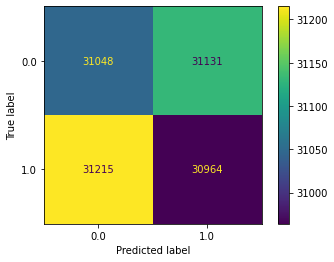

array([[31048, 31131],
       [31215, 30964]])

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_predict)
plt.show()
confusion_matrix(y_train, y_train_predict)

Métricas con DummyClassifier

*   Train




In [ ]:
metricas(y_train, y_train_predict)

Accuracy: 0.4987 
Presicion: 0.4987 
Recall: 0.4980 
F1: 0.4983 




*   Validation

In [ ]:
y_val_pred =  dummy_clf.predict(X_val)

In [ ]:
metricas(y_val, y_val_pred)

Accuracy: 0.5020 
Presicion: 0.5020 
Recall: 0.5034 
F1: 0.5027 



##  C. Elección de una métrica. 

Pensar cuál métrica es conveniente optimizar en éste problema de clasificación donde se predice churn. ¿Sería el Accuracy una buena métrica? 

### Elección de la métrica a optimizar

Teniendo en cuenta que nuestro problema consiste en churn prediction con el objetivo de tomar alguna acción al respecto para mantener a esos usuarios en la plataforma, hay ciertas métricas que van a ser más relevantes que otras:

  - **Accuracy**: Sin dudas sería importante para nosotros tener la menor cantidad de falsos negativos, ya que estos usuarios van a quedar fuera de nuestra campaña de fidelización. Pero por otro lado los falsos positivos no tendrían un impacto significativo, sin embargo podrían significar una perdida de dinero al invertir fidelización en clientes que no era necesario. En cualquier caso. El accuracy del modelo es importante para nuestro caso de uso.

  - **Precision**: La presición nos va a servir para conocer que tanto dinero estaríamos invirtiendo en fidelizar clientes que en realidad no lo necesitaban por haber sido seleccionados como falsos positivos.

  - **Recall**: Esta métrica nos interesaría mucho optimizarla, ya que con un valor elevado, estaríamos teniendo muy pocos casos donde el usuario hace churn y no lo hubieramos predicho. A la par de está métrica hay que evaluar la presición, puesto que si siempre marcaramos como positivos, esta métrica sería ideal, pero se nos iría el presupuesto en la campaña de fidelización.

  - **F1**: Es la métrica más importante para nosotros por que relaciona la precision con el recall, lo cual nos interesa especialmente, ya que sería importante encontrar un punto medio entre recall y precisión para perder la menor cantidad de dinero y a su vez captar en el plan de fidelización a todos los clientes posibles churn.

La metrica que elegimos para optimizar entonces es F1

# 3) Predicción de modelos lineales 

**a. Entrenar modelos lineales de clasificación para predecir la variable objetivo.**

Para ello, deberán utilizar “LogisticRegression” de scikit-learn. Y elegir al menos uno de los siguientes otros modelos: 

- La clase SGDClassifier de scikit-learn. 

- La clase LinearSVC de scikit-learn.

Documentación: 
 - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

 - https://scikit-learn.org/stable/modules/sgd.html https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html 

 - https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html 

**b. Evaluar sobre el conjunto de entrenamiento, validación y test**

Reportando: 
- Accuracy
- Precision
- Recall
- F1
- Matriz de confusión

**c. Elabore conclusiones en base a la métrica a optimizar y compare con el modelo baseline.**

## a. Logistic Regression

Regresión logística
Train metrics: 
Accuracy: 0.5700 
Presicion: 0.5615 
Recall: 0.6391 
F1: 0.5978 

Validation metrics: 
Accuracy: 0.5713 
Presicion: 0.5626 
Recall: 0.6411 
F1: 0.5993 



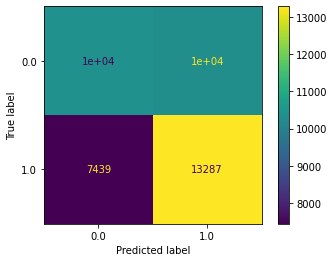

[[10397 10330]
 [ 7439 13287]]
Descenso del gradiente estocastico
Train metrics: 
Accuracy: 0.5366 
Presicion: 0.5265 
Recall: 0.7268 
F1: 0.6107 

Validation metrics: 
Accuracy: 0.5382 
Presicion: 0.5275 
Recall: 0.7309 
F1: 0.6128 



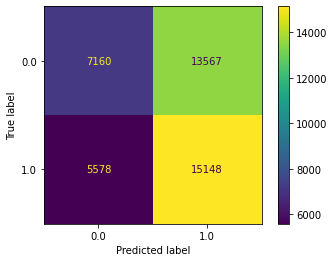

[[ 7160 13567]
 [ 5578 15148]]
SVM


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Train metrics: 
Accuracy: 0.5699 
Presicion: 0.5617 
Recall: 0.6364 
F1: 0.5967 

Validation metrics: 
Accuracy: 0.5709 
Presicion: 0.5624 
Recall: 0.6386 
F1: 0.5981 



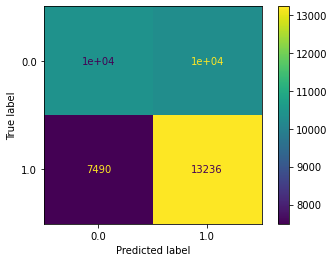

[[10429 10298]
 [ 7490 13236]]


In [ ]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC

## parametros para probar sin balance
#clfs = [LogisticRegression(random_state=RANDOM_STATE,class_weight='balanced'), SGDClassifier(random_state=RANDOM_STATE, class_weight='balanced'), 
        #LinearSVC(random_state=RANDOM_STATE, class_weight='balanced')]

clfs = [LogisticRegression(random_state=RANDOM_STATE), SGDClassifier(random_state=RANDOM_STATE), LinearSVC(random_state=RANDOM_STATE)]
names = ['Regresión logística', 'Descenso del gradiente estocastico', 'SVM']

trained_models = []
for clf,name in zip(clfs,names):
    print(name)

    # Entrenamiento del modelo
    clf.fit(X_train, y_train)

    # Predicción con train
    train_predictions = clf.predict(X_train)
    print("Train metrics: ")
    metricas(y_train, train_predictions)

    # Predicción con validación
    val_predictions = clf.predict(X_val)
    print("Validation metrics: ")
    metricas(y_val, val_predictions)

    cm = confusion_matrix(y_val, val_predictions)
    ConfusionMatrixDisplay.from_predictions(y_val, val_predictions)
    plt.show()
    print(cm)

    trained_models.append(clf)


Observamos que entre estos tres modelos, el que mejor predicciones realiza en base a la metrica elegida es el descenso del gradiente. 

Si bien todos los modelos lineales elegidos otorgan mejores resultado que el modelo de baseline; los resultado siguen siendo "pobres" ya que no logramos metricas mayores al 60% 

# 4) Predicción de modelos basados en árboles de decisión

**a. Para ello, deberán elegir al menos dos de los siguientes modelos:**
- La clase DecisionTreeClassifier de scikit-learn. 
- La clase RandomForestClassifier de scikit-learn. 
- La clase GradientBoostingClassifier de scikit-learn.

**b. Evaluar sobre el conjunto de entrenamiento, validación y test**

Reportando: 
- Accuracy
- Precision
- Recall
- F1
- Matriz de confusión

**c. Elabore conclusiones en base a la métrica a optimizar y compare con el modelo baseline.**

Documentación: 

 - https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html 
 - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html 
 - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html 

Arbol de decision
Train metrics: 
Accuracy: 0.9961 
Presicion: 0.9926 
Recall: 0.9997 
F1: 0.9962 

Validation metrics: 
Accuracy: 0.9960 
Presicion: 0.9924 
Recall: 0.9998 
F1: 0.9961 



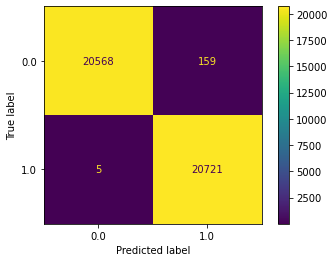

[[20568   159]
 [    5 20721]]
profundidad: 43
Random forest
Train metrics: 
Accuracy: 0.9961 
Presicion: 0.9925 
Recall: 0.9998 
F1: 0.9962 

Validation metrics: 
Accuracy: 0.9934 
Presicion: 0.9885 
Recall: 0.9984 
F1: 0.9934 



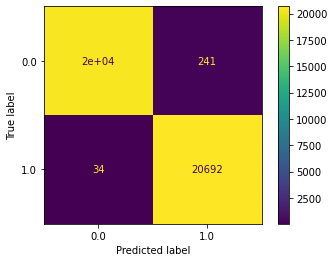

[[20486   241]
 [   34 20692]]
Gradient boosting
Train metrics: 
Accuracy: 0.9188 
Presicion: 0.8726 
Recall: 0.9807 
F1: 0.9235 

Validation metrics: 
Accuracy: 0.9179 
Presicion: 0.8725 
Recall: 0.9789 
F1: 0.9226 



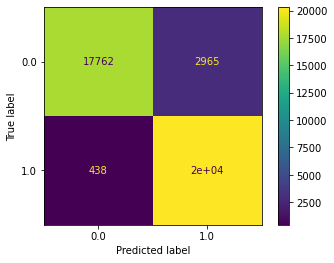

[[17762  2965]
 [  438 20288]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# parametros para probar sin el balance
# clfs = [DecisionTreeClassifier(random_state=RANDOM_STATE, class_weight="balanced"), RandomForestClassifier(random_state=RANDOM_STATE, class_weight="balanced"), 
#         GradientBoostingClassifier(random_state=RANDOM_STATE)]

clfs = [DecisionTreeClassifier(random_state=RANDOM_STATE), RandomForestClassifier(random_state=RANDOM_STATE), GradientBoostingClassifier(random_state=RANDOM_STATE)]
names = ['Arbol de decision', 'Random forest', 'Gradient boosting']

trained_models = []
for clf,name in zip(clfs,names):
    print(name)

    # Entrenamiento del modelo
    clf.fit(X_train, y_train)

    # Predicción con train
    train_predictions = clf.predict(X_train)
    print("Train metrics: ")
    metricas(y_train, train_predictions)

    # Predicción con validación
    val_predictions = clf.predict(X_val)
    print("Validation metrics: ")
    metricas(y_val, val_predictions)

    cm = confusion_matrix(y_val, val_predictions)
    ConfusionMatrixDisplay.from_predictions(y_val, val_predictions)
    plt.show()
    print(cm)

    if name == "Arbol de decision":
      print('profundidad:', clf.get_depth())

    trained_models.append(clf)

En este caso, obtuvimos resultados mucho mejores que con los modelos lineales y el modelo de baseline, alcanzando metricas cercanas al 99%. 

El mejor modelo en terminos de F1 es el Decision Tree Classifier, seguido por random forest.

# 5) Ajuste por hiperparámetros 

a. Para los dos “mejores modelos” obtenidos en los puntos anteriores, seleccionar valores para los hiperparámetros principales de dichos modelos (ajustar con por lo menos 3 parámetros). Utilizar grid-search y k-fold cross-validation. 

b. Mencionar el mejor modelo obtenido de la Optimización de Hiperparámetros y con cuáles parámetros se obtuvo ese resultado. 

c. Con el mejor modelo obtenido realizar las predicciones sobre test y val.

d. Reportar las métricas del mejor modelo, incluyendo las matrices de confusión. Comparar el mejor modelo obtenido, con el modelo con parámetros por defecto y con el modelo baseline. Elabore conclusiones al respecto pensando en la resolución de nuestro problema de clasificación.



> DecisionTreeClassifier


In [ ]:
#'class_weight':['balanced']
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [i for i in range(25,35)],
    'min_samples_split': [2,10,15],
    'max_features': ['auto', None]
}

In [ ]:
from sklearn.model_selection import ParameterGrid

for params in ParameterGrid(param_grid):
    #print(params)
    model = DecisionTreeClassifier(**params, random_state=RANDOM_STATE)



> parámetro **scoring='f1'**



In [ ]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier(random_state=RANDOM_STATE)

cv = GridSearchCV(model, param_grid, scoring='f1', cv=None) 
cv.fit(X_train, y_train);

In [ ]:
results = cv.cv_results_
params = results['params']
mean = results['mean_test_score']
std = results['std_test_score']
rank = results['rank_test_score']

df = pd.DataFrame(results)
df[['param_criterion', 'param_max_depth', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('rank_test_score', axis=0, ascending=True)

#print("crit.\tdepth\tmax_f\tn_est\t| mean\tstd\trank")
for p, m, s, r in zip(params, mean, std, rank):
    print(f"{p['criterion']}\t{p['max_depth']}\t{p['min_samples_split']}\t{p['max_features']}\t| {m:0.2f}\t{s:0.2f}\t{r}")

gini	25	2	auto	| 0.87	0.02	101
gini	25	10	auto	| 0.85	0.01	107
gini	25	15	auto	| 0.86	0.01	103
gini	25	2	None	| 0.99	0.00	28
gini	25	10	None	| 0.99	0.00	28
gini	25	15	None	| 0.99	0.00	28
gini	26	2	auto	| 0.88	0.01	98
gini	26	10	auto	| 0.87	0.02	99
gini	26	15	auto	| 0.89	0.01	93
gini	26	2	None	| 0.99	0.00	25
gini	26	10	None	| 0.99	0.00	25
gini	26	15	None	| 0.99	0.00	25
gini	27	2	auto	| 0.90	0.01	85
gini	27	10	auto	| 0.88	0.01	95
gini	27	15	auto	| 0.89	0.01	92
gini	27	2	None	| 0.99	0.00	22
gini	27	10	None	| 0.99	0.00	23
gini	27	15	None	| 0.99	0.00	23
gini	28	2	auto	| 0.90	0.01	84
gini	28	10	auto	| 0.90	0.00	90
gini	28	15	auto	| 0.90	0.01	86
gini	28	2	None	| 1.00	0.00	19
gini	28	10	None	| 1.00	0.00	19
gini	28	15	None	| 1.00	0.00	19
gini	29	2	auto	| 0.92	0.01	78
gini	29	10	auto	| 0.92	0.01	79
gini	29	15	auto	| 0.91	0.01	81
gini	29	2	None	| 1.00	0.00	16
gini	29	10	None	| 1.00	0.00	16
gini	29	15	None	| 1.00	0.00	16
gini	30	2	auto	| 0.93	0.01	75
gini	30	10	auto	| 0.93	0.01	73
gini	30	15	auto	

In [ ]:
best_model_tc = cv.best_estimator_

In [ ]:
best_model_tc

DecisionTreeClassifier(max_depth=30, random_state=45)

De acuerdo a la busqueda de parametros con grid-search, los parametros que nos permiten obtener la mejor métrica de f1 son: 
- Profundidad del arbol = 30
- Criterio: gini
- max_features = None


Vamos ahora a realizar predicciones sobre el conjunto de validación y entrenamiento para comprobar los resultados y para verificar que no haya overfitting:



• Train

In [ ]:
y_train_pred_bm = best_model_tc.predict(X_train) #Predicciones sobre conjunto de entrenamiento

In [ ]:
confusion_matrix(y_train, y_train_pred_bm)

array([[61716,   463],
       [   17, 62162]])

In [ ]:
# metricas train
metricas(y_train, y_train_pred_bm) 

Accuracy: 0.9961 
Presicion: 0.9926 
Recall: 0.9997 
F1: 0.9962 



• Validation:

In [ ]:
y_val_pred_bm = best_model_tc.predict(X_val) #predicciones sobre conjunto de validación

In [ ]:
#metricas validacion
metricas(y_val,y_val_pred_bm) 

Accuracy: 0.9960 
Presicion: 0.9924 
Recall: 0.9998 
F1: 0.9961 



En general obtenemos metricas altas y muy similares en los dos conjuntos.



> Random Forest



In [ ]:
from sklearn import ensemble

In [ ]:
param_grid = { 
    'n_estimators': [100],  # numero de modelos del random forest
    'max_features': ['sqrt' ], #'log2'
    'max_depth' : [4,5,6,15,30],
    'criterion' :['gini', 'entropy']
}

In [ ]:
from sklearn.model_selection import ParameterGrid

for params in ParameterGrid(param_grid):
    print(params)
    model = ensemble.RandomForestClassifier(**params, random_state=RANDOM_STATE)

{'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 100}
{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100}
{'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 100}
{'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 100}
{'criterion': 'gini', 'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 100}
{'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 100}
{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100}
{'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 100}
{'criterion': 'entropy', 'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 100}
{'criterion': 'entropy', 'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 100}


In [ ]:
from sklearn.model_selection import GridSearchCV

model = ensemble.RandomForestClassifier(random_state=RANDOM_STATE)

cv = GridSearchCV(model, param_grid,scoring='f1') # accuracy, f1
cv.fit(X_train, y_train);
##esto tarda bastante en correr

In [ ]:
#results

In [ ]:
results = cv.cv_results_
params = results['params']
mean = results['mean_test_score']
std = results['std_test_score']
rank = results['rank_test_score']

print("crit.\tdepth\tmax_f\tn_est\t| mean\tstd\trank")
for p, m, s, r in zip(params, mean, std, rank):
    print(f"{p['criterion']}\t{p['max_depth']}\t{p['max_features']}\t{p['n_estimators']}\t| {m:0.2f}\t{s:0.2f}\t{r}")

crit.	depth	max_f	n_est	| mean	std	rank
gini	4	sqrt	100	| 0.69	0.00	10
gini	5	sqrt	100	| 0.73	0.01	7
gini	6	sqrt	100	| 0.73	0.01	6
gini	15	sqrt	100	| 0.86	0.00	3
gini	30	sqrt	100	| 0.95	0.00	1
entropy	4	sqrt	100	| 0.70	0.02	8
entropy	5	sqrt	100	| 0.70	0.01	9
entropy	6	sqrt	100	| 0.73	0.01	5
entropy	15	sqrt	100	| 0.84	0.01	4
entropy	30	sqrt	100	| 0.93	0.00	2


In [ ]:
best_model_rf = cv.best_estimator_

In [ ]:
best_model_rf

RandomForestClassifier(max_depth=30, max_features='sqrt', random_state=45)

 El método eligió un mejor modelo con una profundidad máxima de 30 y usar la raíz cuadrada para calcular y considerar el número de variables al buscar la mejor división. 
Parámetros: `max_depth=30` y `max_features=sqrt`

Ahora vamos a utilizar este modelo para realizar predicciones sobre el conjunto de entrenamiento y validadción. Para corroborar los resultados y comprobar que no haya overfitting.



• Train

In [ ]:
y_train_pred_rf = best_model_rf.predict(X_train)

In [ ]:
confusion_matrix(y_train, y_train_pred_rf)

array([[57289,  4890],
       [  848, 61331]])

In [ ]:
# metricas
metricas(y_train, y_train_pred_rf) 

Accuracy: 0.9539 
Presicion: 0.9262 
Recall: 0.9864 
F1: 0.9553 



• Validation

In [ ]:
y_val_pred_rf = best_model_rf.predict(X_val)

In [ ]:
metricas(y_val, y_val_pred_rf)

Accuracy: 0.9501 
Presicion: 0.9218 
Recall: 0.9836 
F1: 0.9517 



Nuevamente los resultados son altos; aunque más bajos que en el modelo anterior. Ademas, ahora hay un leve overfitting del modelo. 

## Elección del mejor modelo:

En base a lo analizado anteriormente podemos decir que el mejor modelo para predecir los usuarios que realizan y no realizan churn es `DecisionTreeClassifier` con los siguientes parametros:


- `'criterion' = gini`
- `'max_depth' = 30`
- `'max_features' = None` 


Con este modelo entonces tendremos que:



In [ ]:
from sklearn.tree import DecisionTreeClassifier

churn_best_model = DecisionTreeClassifier(random_state=RANDOM_STATE, criterion = 'gini', max_depth = 30, max_features = None)
churn_best_model.fit(X_train, y_train)

# Predicción con train
train_churn_predictions = churn_best_model.predict(X_train)
print("Train metrics: ")
metricas(y_train, train_churn_predictions)

# Predicción con validación
val_churn_predictions = churn_best_model.predict(X_val)
print("Validation metrics: ")
metricas(y_val, val_churn_predictions)

# Predicción sobre testing
test_churn_predictions = churn_best_model.predict(X_test)
print("Test metrics: ")
metricas(y_test, test_churn_predictions)

Train metrics: 
Accuracy: 0.9961 
Presicion: 0.9926 
Recall: 0.9997 
F1: 0.9962 

Validation metrics: 
Accuracy: 0.9960 
Presicion: 0.9924 
Recall: 0.9998 
F1: 0.9961 

Test metrics: 
Accuracy: 0.9961 
Presicion: 0.9927 
Recall: 0.9996 
F1: 0.9961 

